# Bike Sharing linear regression

In [1]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataframe libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [3]:
# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline 

# Understading Data

In [4]:
# Read dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Inspecting the data frame

In [5]:
bike.shape

(730, 16)

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
## Checking for null values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Conslusion : No Null values are present

In [9]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# Column names are bit confusing,hence renaming them for better understanding

bike.rename(columns = {'yr':'year', 'mnth':'months', 'hum':'humidity', 'cnt':'count'}, inplace= 'True')
bike.head()

,instant,dteday,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Checking for Duplicates

In [11]:
# Checking for duplicate entries and dropping if any

bike_dup = bike

bike_dup.drop_duplicates(subset = None, inplace = None)
bike_dup.shape


(730, 16)

### Conclusion : No duplicate values present

# Removing Redundant colums

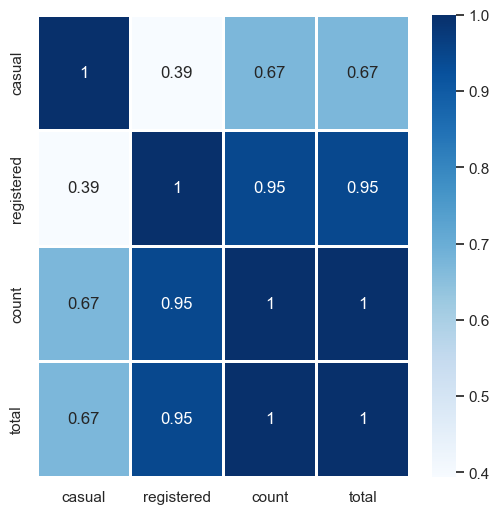

In [12]:
# Removing redundant columns
bike_cnt = bike[['casual', 'registered', 'count']]

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']

plt.figure(figsize = (6,6))
ax = sns.heatmap(bike_cnt.corr(), annot = True, cmap='Blues', linewidth = 1)
plt.show()

In [13]:
## Dropping the redundant columns

bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.shape

(730, 12)

# Data Visualization

In [14]:
# Season
bike.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
#bike.season.value_counts(normalize = True)
bike.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [15]:
# Months
bike.months.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.months.value_counts()

months
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [16]:
# Weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts()

weathersit
Clear             463
Misty             246
Light_rainsnow     21
Name: count, dtype: int64

In [17]:
# Weekday
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64

# Analyzing Categorical Variable

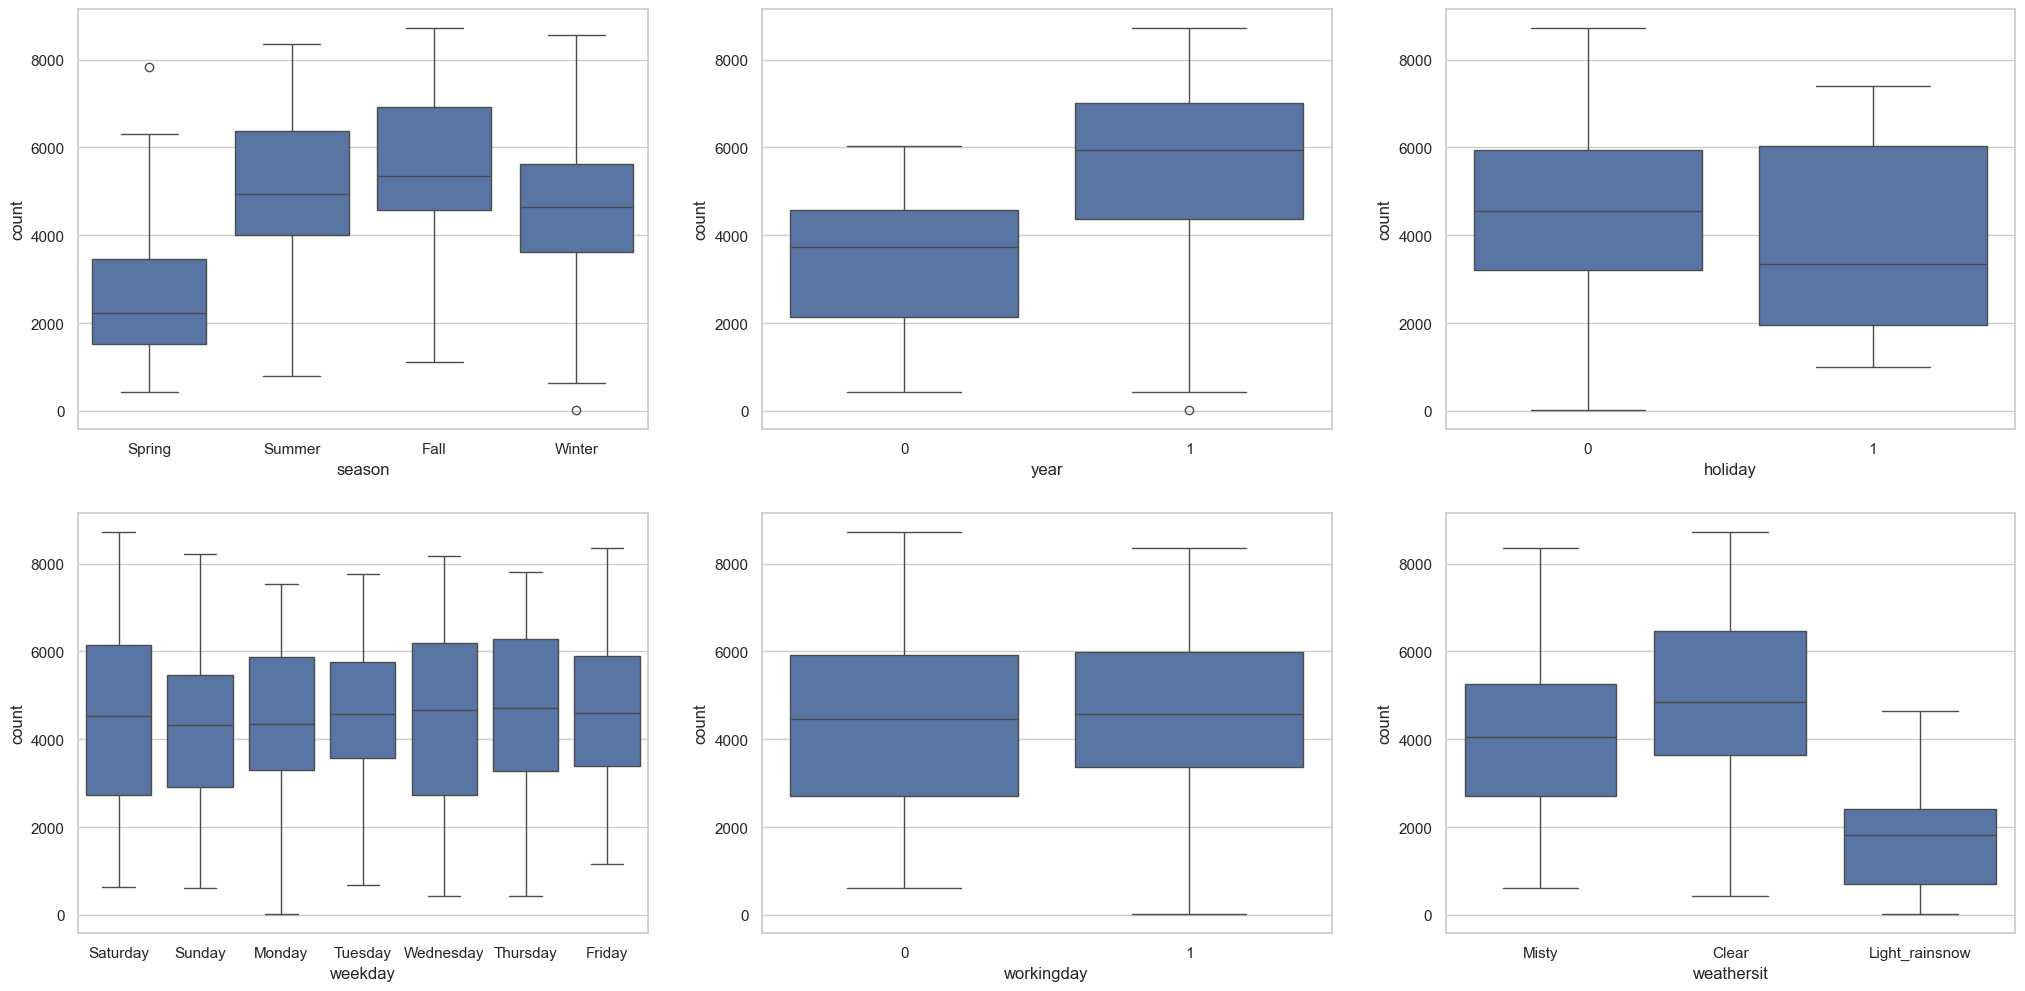

In [18]:
def boxplot_cat_var(cat_var,target):
    plt.figure(figsize=(25, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = bike)
    plt.show()

cat_var =['season','year','holiday','weekday','workingday','weathersit']
boxplot_cat_var(cat_var,'count')

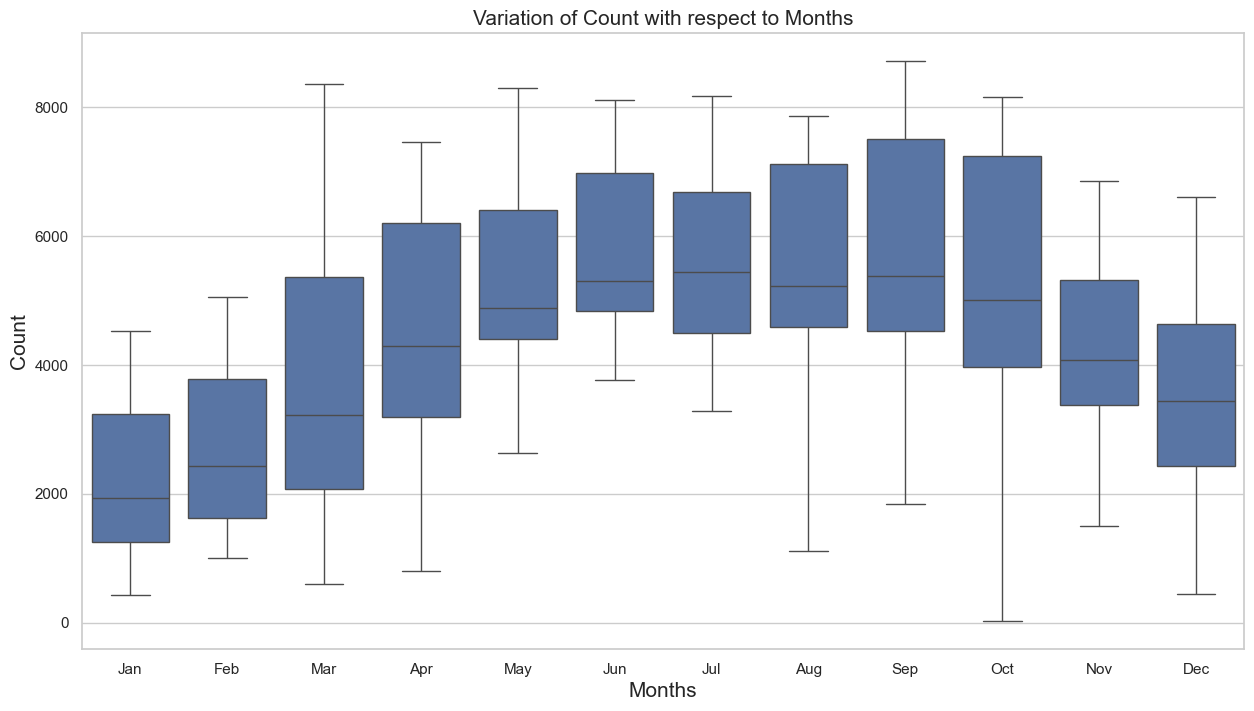

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'months', y = 'count', data = bike).set_title('Variation of Count with respect to Months', fontsize = 15)
plt.xlabel("Months", fontsize = 15) 
plt.ylabel("Count", fontsize = 15) 
plt.show()

In [20]:
# Function to generate statistics for categorical variables

def cat_stats(col):
    cat_df = bike.groupby(col)['count'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike['count'].sum()*100
    cat_df['count_perc']=cat_df['count']/bike['count'].count()*100
    return round(cat_df,2)

In [21]:
# Functions to generate plots for categorical variables

def cat_plots(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(x=col, y='count', data= bike)
    plt.subplot(1,2,2)
    sns.barplot(x=col, y='count', data= bike, hue = 'year', palette = 'Paired')
    plt.legend(labels=['2018', '2019'])
    return

# Analysis of Seasons

In [22]:
cat_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


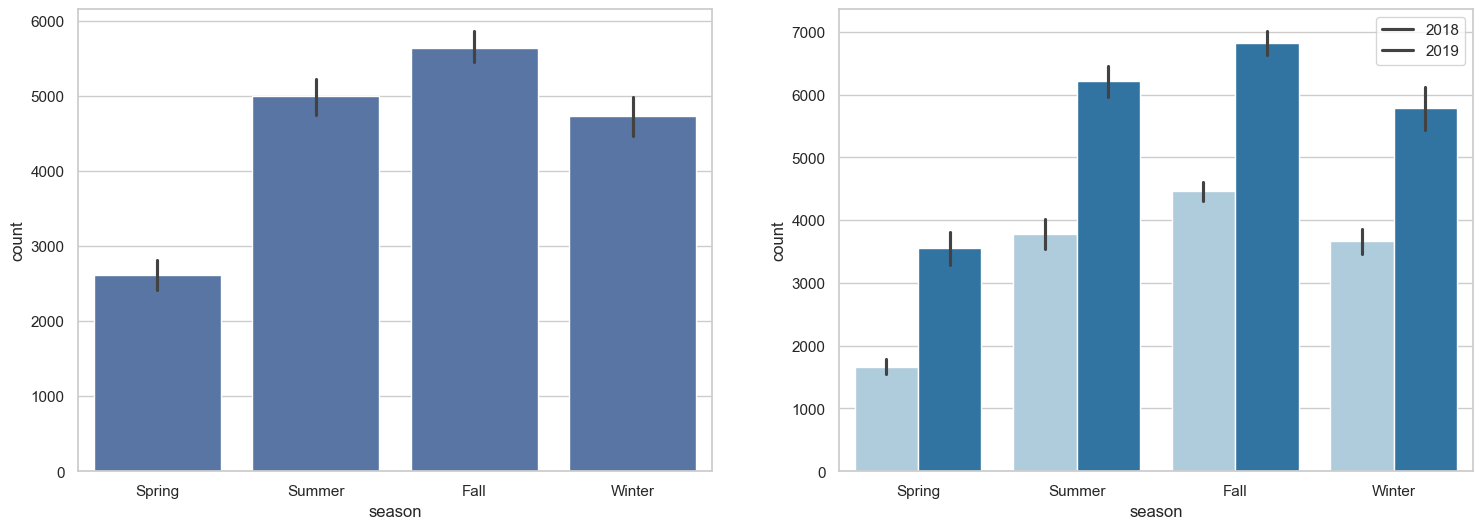

In [23]:
cat_plots('season', 18,6)

# Observation
##### 32% of the booking happend in Fall
##### summer with 27% and winter with 25%

# Analysis of Months

In [24]:
cat_stats('months')

,sum,mean,count,sum_perc,count_perc
months,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


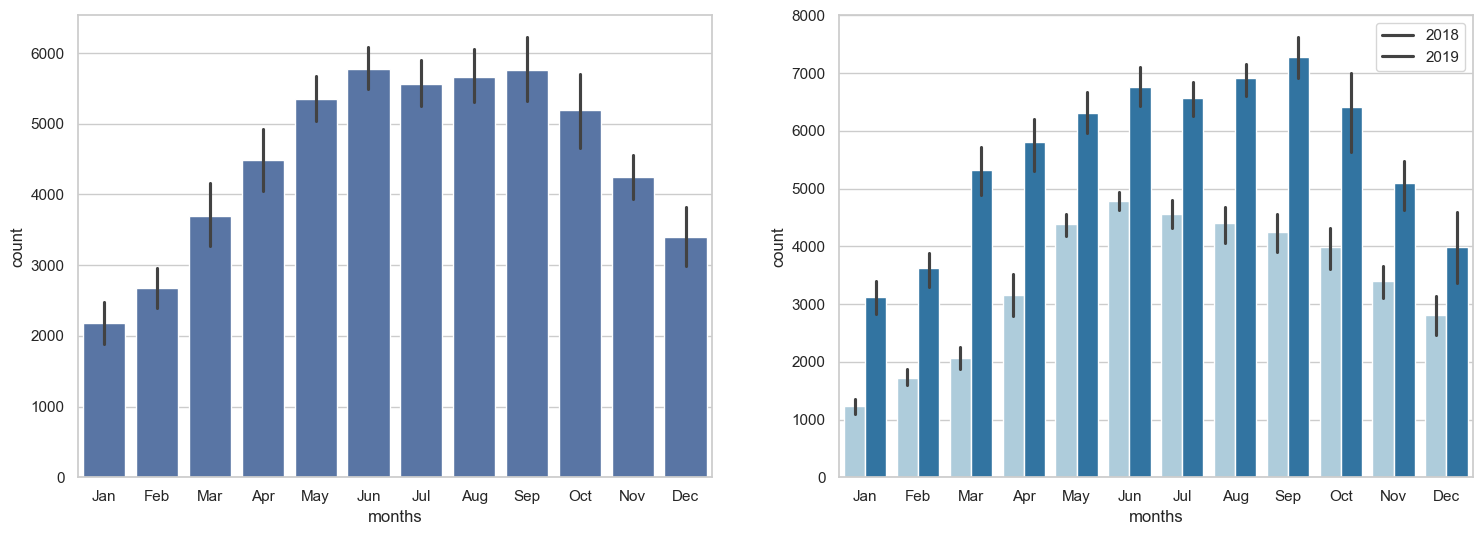

In [25]:
cat_plots('months', 18,6)

# Observation
##### More than 10% of booking happend in months of may and sep.

# Analysing Weathersit

In [26]:
cat_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


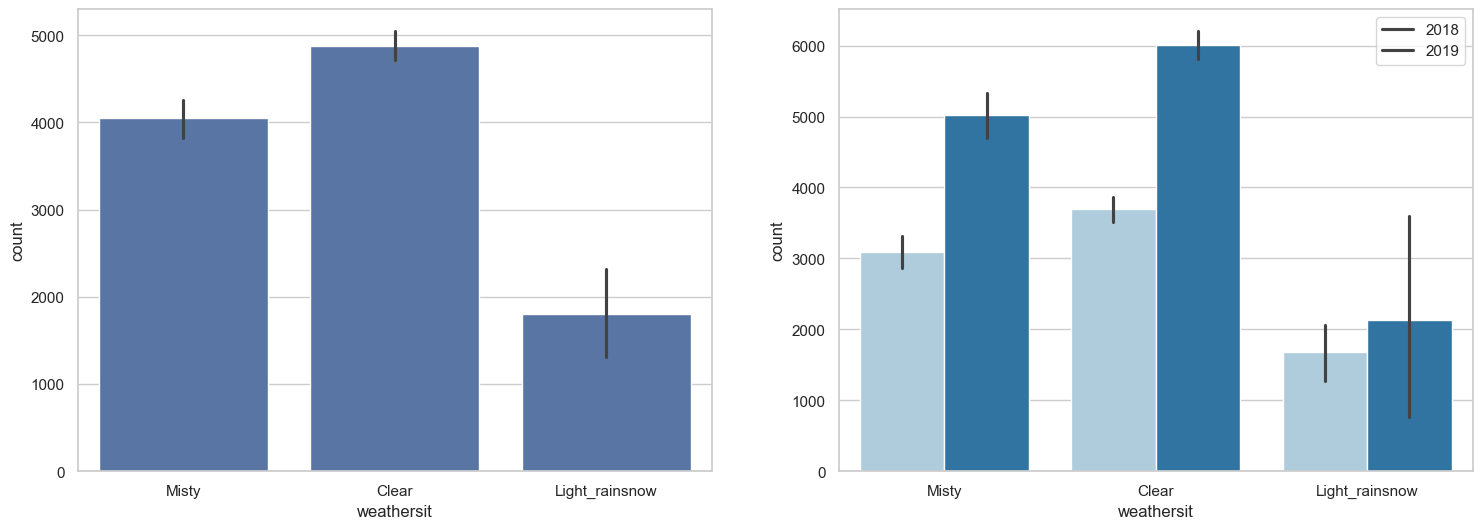

In [27]:
cat_plots('weathersit', 18,6)

# Observation
##### During clear weather,68.6% of the booking happened . 
#####  30.24% of booking happened in Misty weather. 

# Analysis of weekday

In [28]:
cat_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Thursday,485395,4667.26,104,14.75,14.25
Saturday,477807,4550.54,105,14.52,14.38
Wednesday,471214,4574.89,103,14.32,14.11
Tuesday,469109,4510.66,104,14.25,14.25
Monday,455503,4338.12,105,13.84,14.38
Sunday,444027,4228.83,105,13.49,14.38


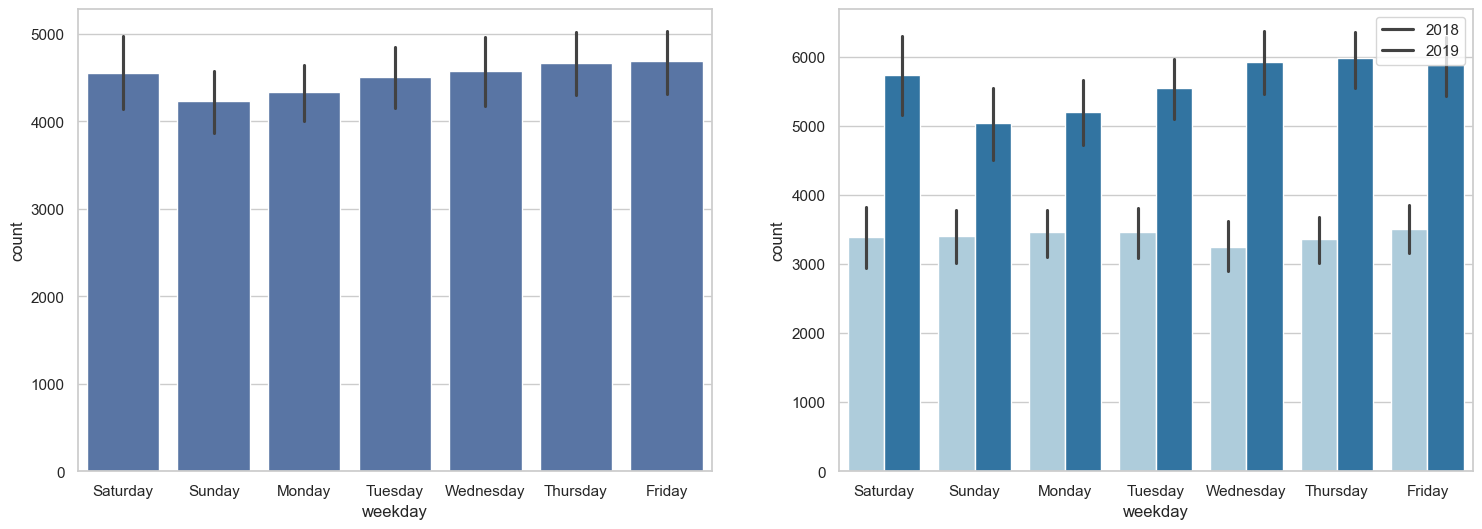

In [29]:
cat_plots('weekday',18,6)

# Observation
###### Bookings done on a weekday are almost evenly distributed i.e around 14%

# Analysis of workingday

In [30]:
cat_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


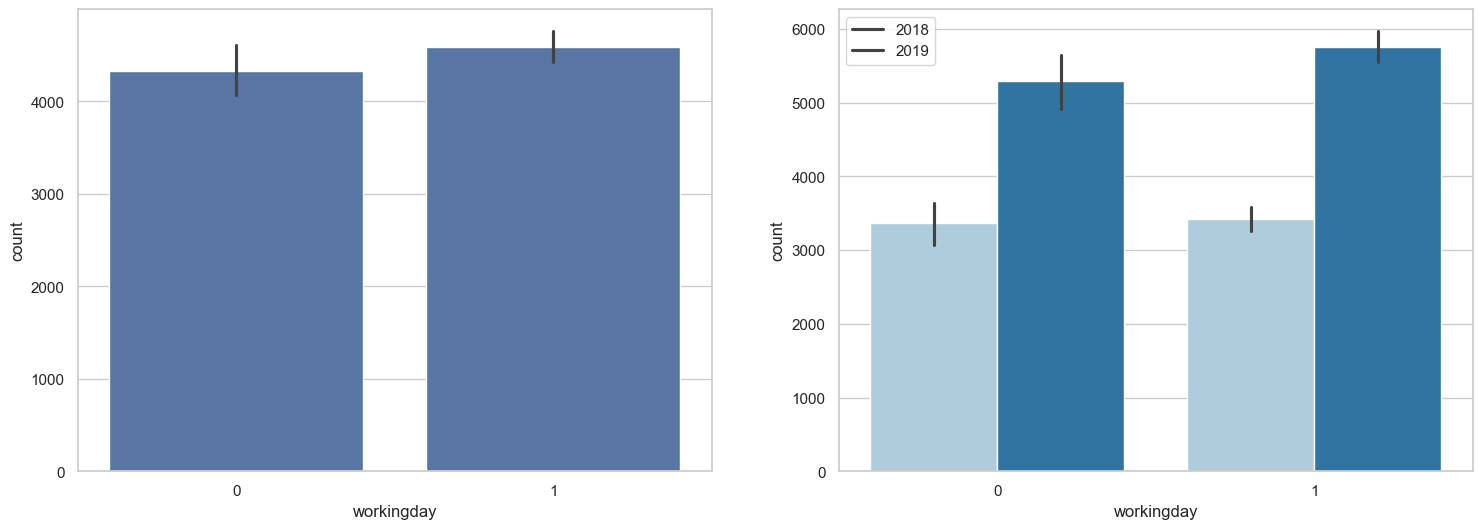

In [31]:
cat_plots('workingday', 18,6)

# Observation
###### Almost 69% of the bike booking happened on a working day.

# Analysis of holiday

In [32]:
cat_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


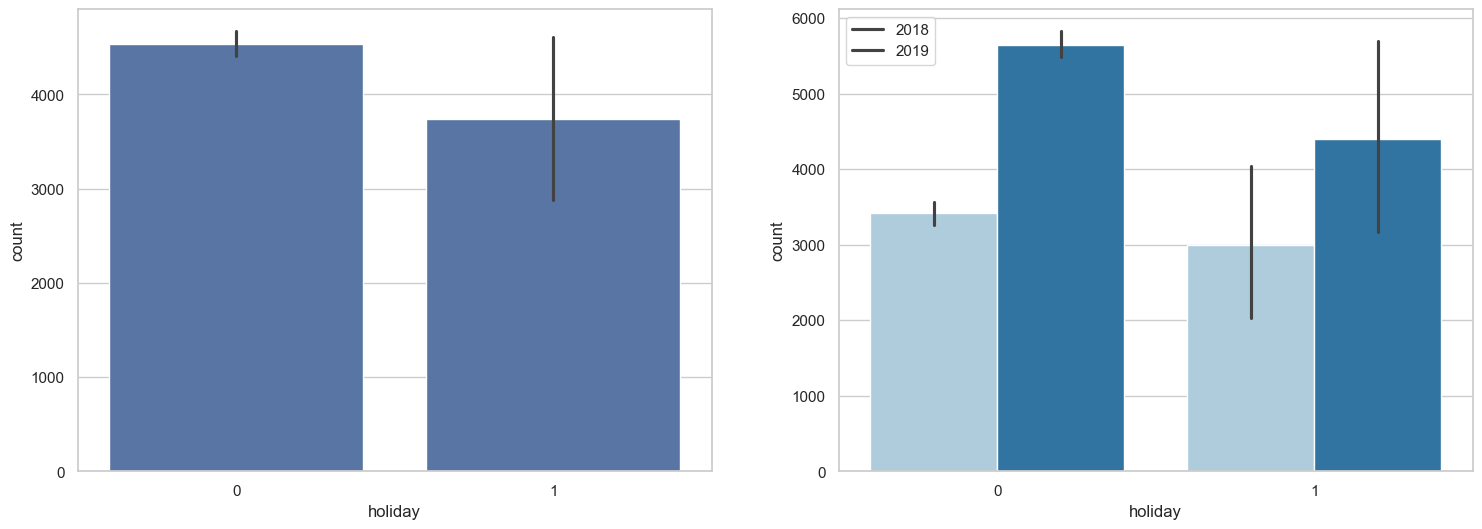

In [33]:
cat_plots('holiday', 18,6)

# Observation
###### Around 97% of bike rentals took place during non-holiday time.

# Analysis of year

In [34]:
cat_stats('year')

,sum,mean,count,sum_perc,count_perc
year,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


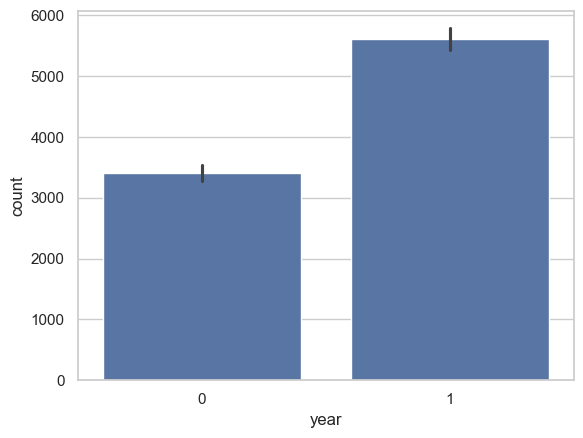

In [35]:
sns.barplot(x='year', y='count', data= bike)
plt.show()

# Observation
###### There has been a significant growth in demand during 2019 comapred to 2018

# Numerical Variable Analysis

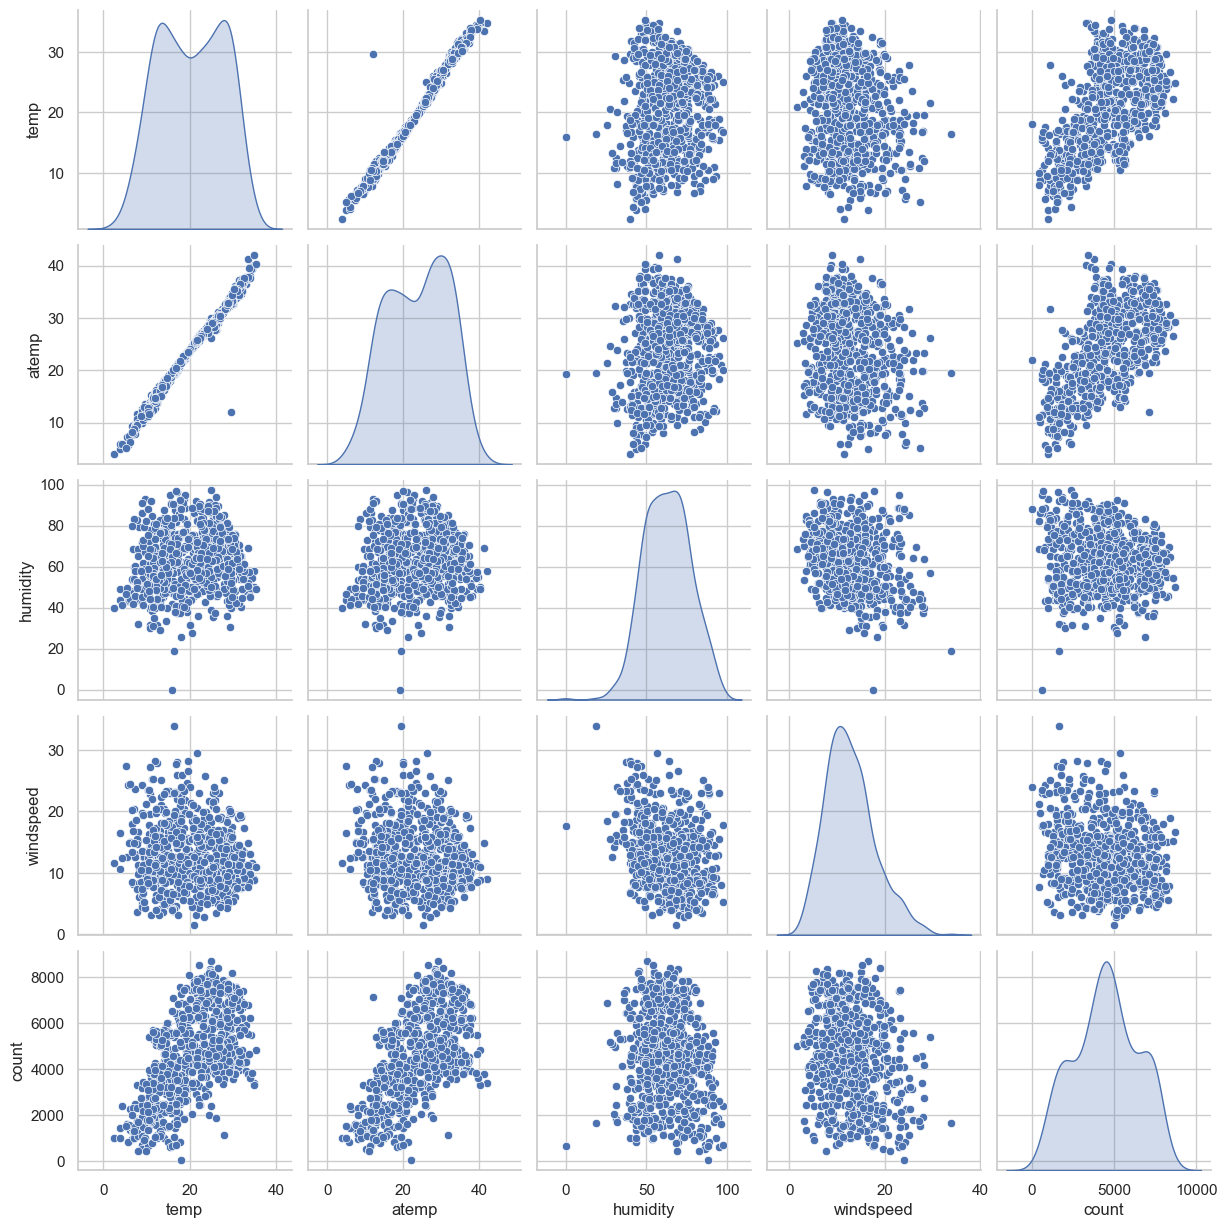

In [36]:
bike_num = bike[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(bike_num,diag_kind='kde')
plt.show()

# Observation
######  Linear relation between 'temp','atemp' and 'cnt' , we can see both variables has close values

<Axes: >

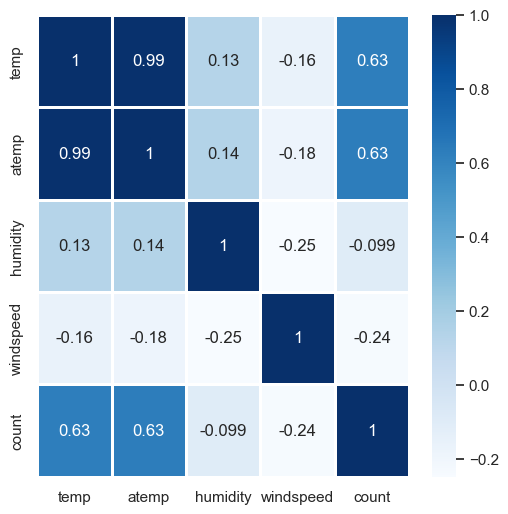

In [37]:
plt.figure(figsize = (6,6))
sns.heatmap(bike_num.corr(), cmap='Blues', annot=True, linewidth=1)

<Figure size 4000x600 with 0 Axes>

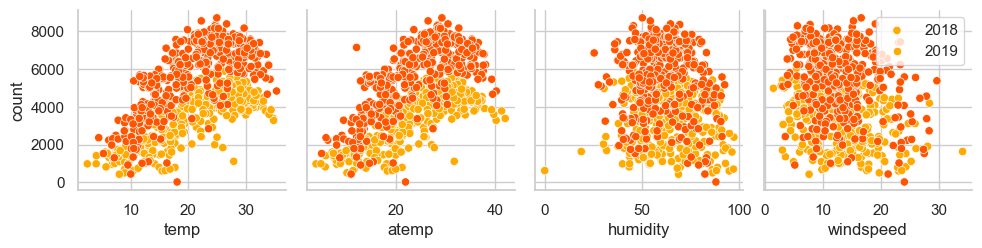

In [38]:
# Checking the impact of year against the numerical variable : 
plt.figure(figsize = (40,6))
ax = sns.pairplot(x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars=['count'] , data=bike, hue='year', palette='autumn_r')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

# Creating Dummy variables

In [40]:
# Dummy Variable
months=pd.get_dummies(bike.months,drop_first=True,dtype=int)
weekdays=pd.get_dummies(bike.weekday,drop_first=True,dtype=int)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True,dtype=int)
seasons=pd.get_dummies(bike.season,drop_first=True,dtype=int)

In [41]:
### Merging the dataframe

bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [42]:
### Dropping the unwanted columns

bike.drop(['months', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)

In [43]:
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [44]:
bike.shape

(730, 30)

In [45]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    int32  
 1   Dec             730 non-null    int32  
 2   Feb             730 non-null    int32  
 3   Jan             730 non-null    int32  
 4   Jul             730 non-null    int32  
 5   Jun             730 non-null    int32  
 6   Mar             730 non-null    int32  
 7   May             730 non-null    int32  
 8   Nov             730 non-null    int32  
 9   Oct             730 non-null    int32  
 10  Sep             730 non-null    int32  
 11  Monday          730 non-null    int32  
 12  Saturday        730 non-null    int32  
 13  Sunday          730 non-null    int32  
 14  Thursday        730 non-null    int32  
 15  Tuesday         730 non-null    int32  
 16  Wednesday       730 non-null    int32  
 17  Light_rainsnow  730 non-null    int

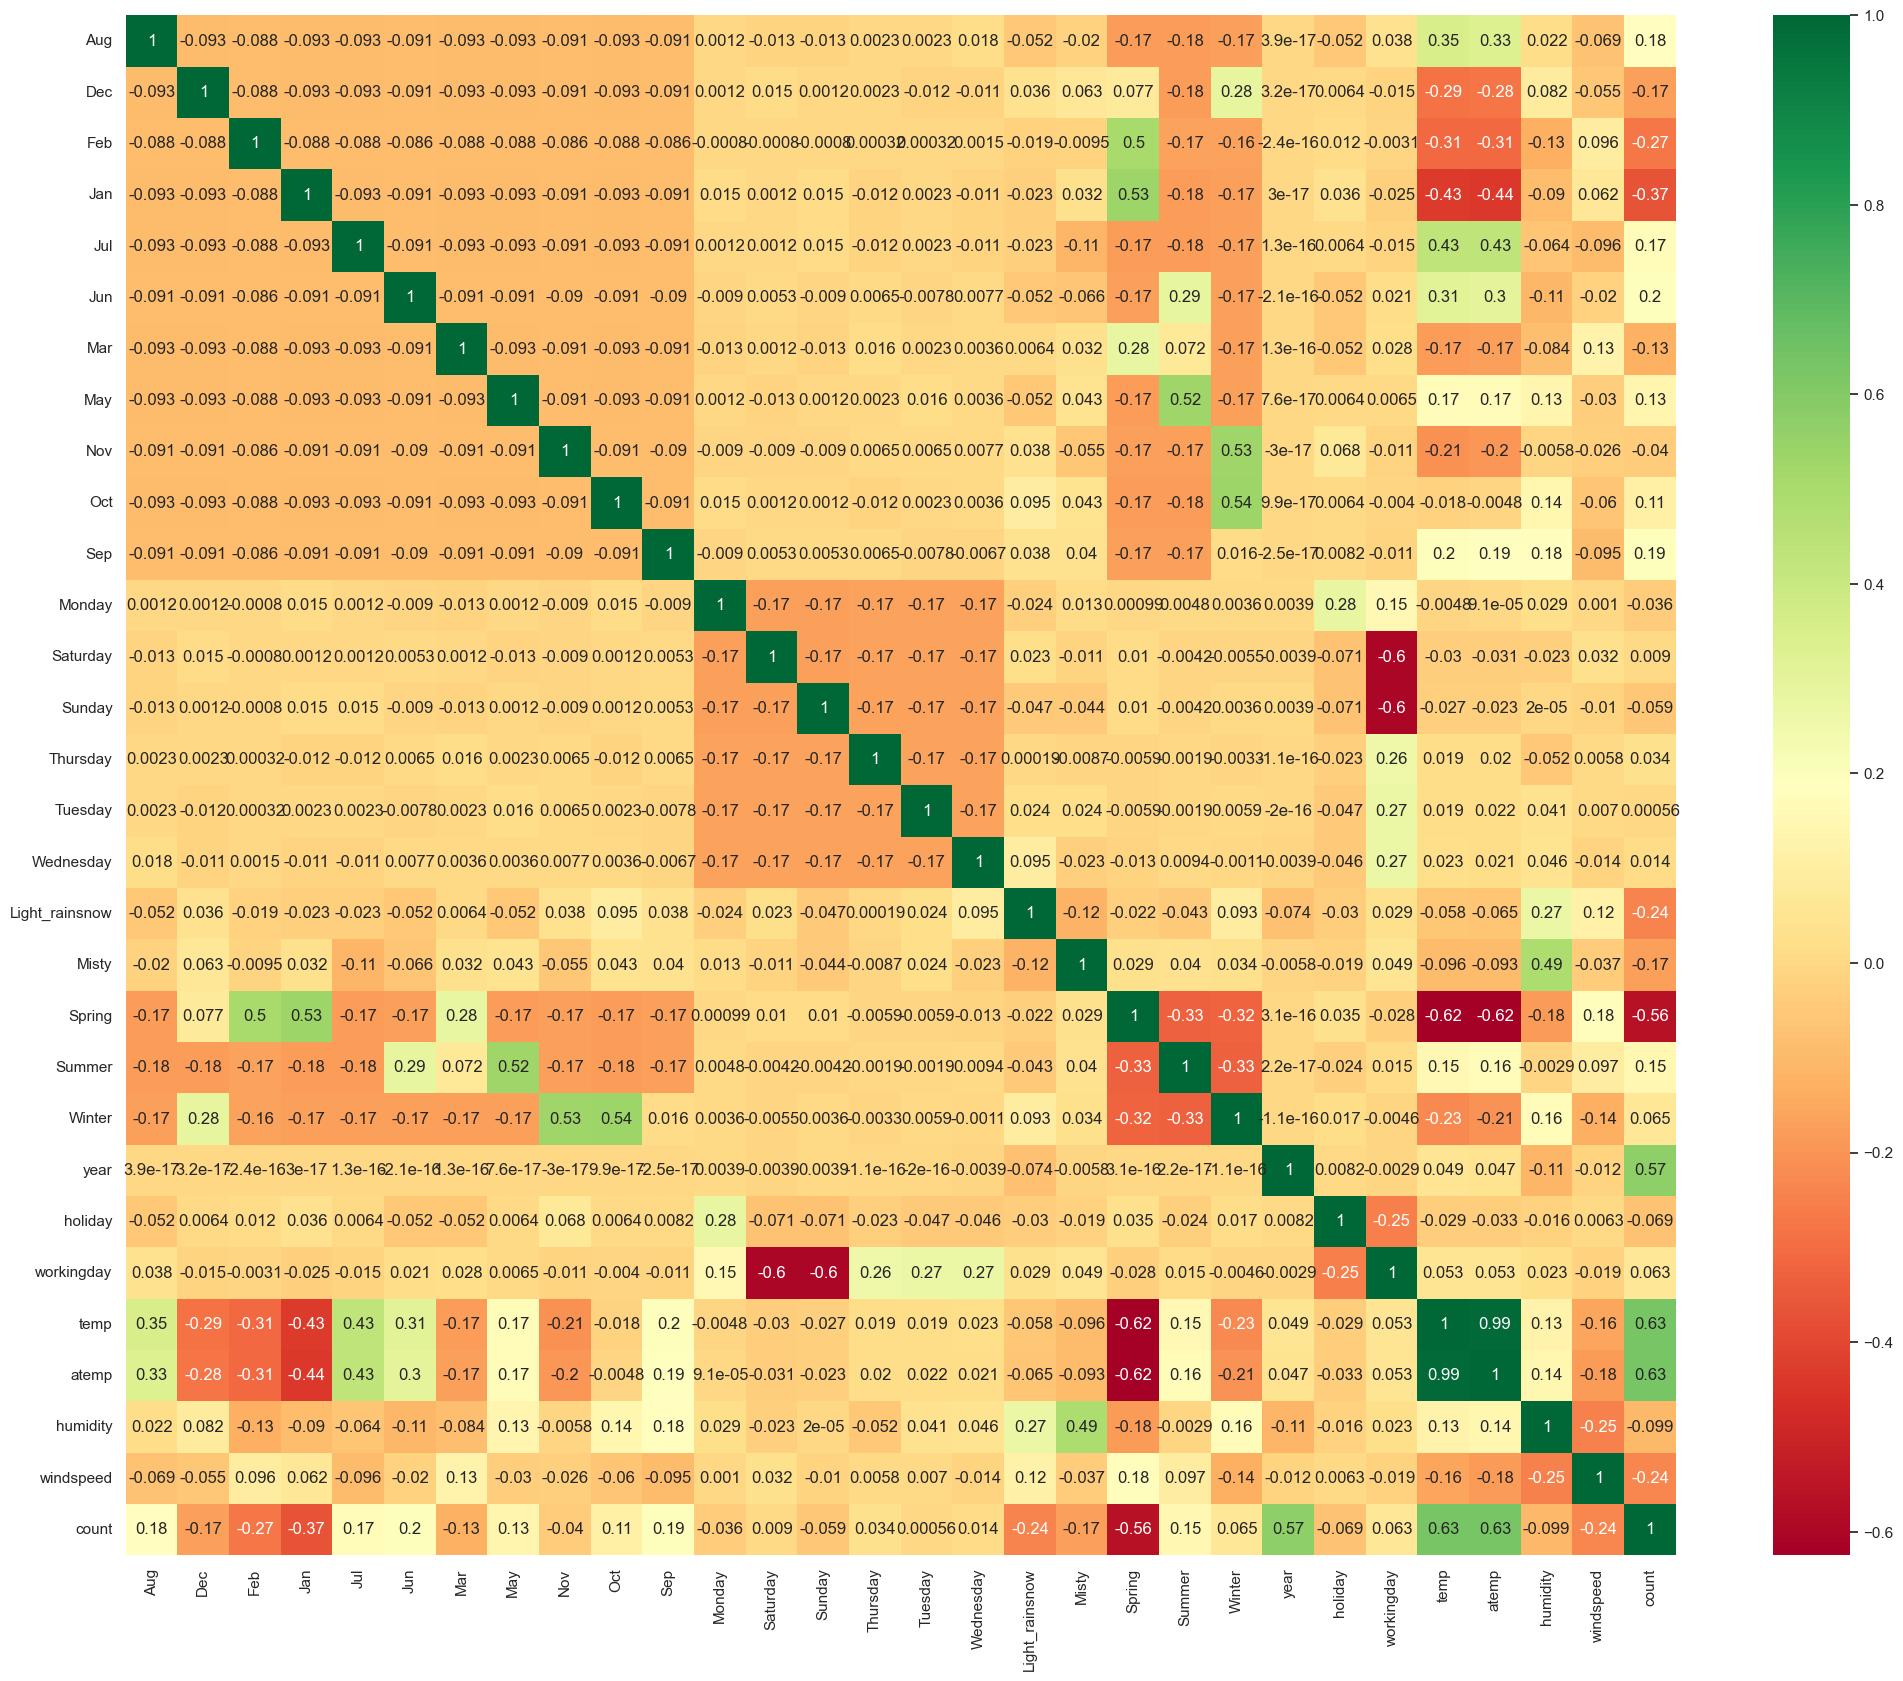

In [46]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.show()

# Observations
###### We will use either temp or atemp as there is high multicolinearity amongst the two.
###### temp, atemp and year has a strong correlation with count.
###### Spring is negatively correlated with count.
###### Misty weather and humidity are correlated.
###### Months and corresponding weathers are co-related as expecetd

# Splitting the data into Train and Test Data set

In [47]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike,train_size = 0.7, random_state=100)

In [48]:
bike_train.shape

(510, 30)

In [49]:
bike_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


In [50]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


# Rescaling the bike_train dataframe

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [53]:
# Appliyng scaler on numerical vars
num_vars = ['temp','humidity','windspeed','count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [54]:
bike_train[num_vars].head()

,temp,humidity,windspeed,count
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [55]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095


In [56]:
# Building the model

y_train = bike_train.pop('count')
X_train = bike_train

In [57]:
X_train

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,33.14480,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,20.67460,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,11.58500,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,18.87520,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,16.09770,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.863973,35.35440,0.679690,0.187140
53,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0.202618,12.28585,0.435939,0.111379
350,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.248216,12.46855,0.577930,0.431816
79,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0.462664,20.48675,0.759870,0.529881


# Recursive Feature Elimination:
### We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe =rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 8),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 15),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Spring', False, 2),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 16),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [61]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jul', 'Sep', 'Saturday', 'Sunday', 'Light_rainsnow', 'Misty', 'Summer',
       'Winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [62]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday', 'Spring', 'atemp'],
      dtype='object')

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,Jul,Sep,Saturday,Sunday,Light_rainsnow,Misty,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed
576,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,1,0,0,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,0,0,1,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,1,0,0,1,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,1,1,0,0,0,1,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,0,0,0,0,0,0,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,1,0,0,1,0,1,0,0,0,0.248216,0.577930,0.431816
79,0,0,0,0,0,1,1,0,0,0,1,0.462664,0.759870,0.529881


In [64]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
3,Saturday,inf
4,Sunday,inf
10,holiday,inf
11,workingday,inf
13,humidity,1.88
12,temp,1.60
6,Misty,1.56
1,Jul,1.43
7,Summer,1.33
8,Winter,1.29


# MODEL 1

In [67]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_rfe).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.23e-191
Time:                        17:39:24   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1529      0.022      7.

# MODEL 2

In [79]:
# Model 2
X_train_new = X_train_rfe.drop(['Sunday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,Saturday,inf
4,Sunday,inf
10,holiday,inf
11,workingday,inf
13,humidity,1.88
12,temp,1.60
6,Misty,1.56
1,Jul,1.43
7,Summer,1.33
8,Winter,1.29


In [69]:

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_new).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.23e-191
Time:                        17:39:25   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1822      0.029      6.

# MODEL 3

In [80]:
# MODEL 3
X_train_new = X_train_lm1.drop(['Saturday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,Saturday,inf
4,Sunday,inf
10,holiday,inf
11,workingday,inf
13,humidity,1.88
12,temp,1.60
6,Misty,1.56
1,Jul,1.43
7,Summer,1.33
8,Winter,1.29


In [71]:

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_new).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.23e-191
Time:                        17:39:25   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2355      0.028      8.

# MODEL 4

In [82]:
# Model 4
X_train_new = X_train_lm1.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,Saturday,inf
4,Sunday,inf
10,holiday,inf
11,workingday,inf
13,humidity,1.88
12,temp,1.60
6,Misty,1.56
1,Jul,1.43
7,Summer,1.33
8,Winter,1.29


In [73]:

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_new).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.23e-191
Time:                        17:39:25   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2256      0.027      8.

# MODEL 5

In [84]:
# Model 5
X_train_new = X_train_lm1.drop(['Jul'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,Saturday,inf
4,Sunday,inf
10,holiday,inf
11,workingday,inf
13,humidity,1.88
12,temp,1.60
6,Misty,1.56
1,Jul,1.43
7,Summer,1.33
8,Winter,1.29


In [75]:
# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_new).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.26e-191
Time:                        17:39:25   Log-Likelihood:                 510.60
No. Observations:                 510   AIC:                            -995.2
Df Residuals:                     497   BIC:                            -940.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1529      0.022      6.